[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



A. male/ female
B. Hours slept
C. number of romantic partners
D. time to complete task

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")


Part a. Construct a histogram of CO2 emissions.

In [11]:
carbon_west.head(10)

,Nation,CO2
0,Albania,2.0
1,Australia,15.4
2,Austria,6.9
3,Belgium,8.3
4,Bosnia,6.2
5,Bulgaria,5.9
6,Canada,15.1
7,Croatia,4.0
8,Cyprus,5.3
9,Czech,9.2


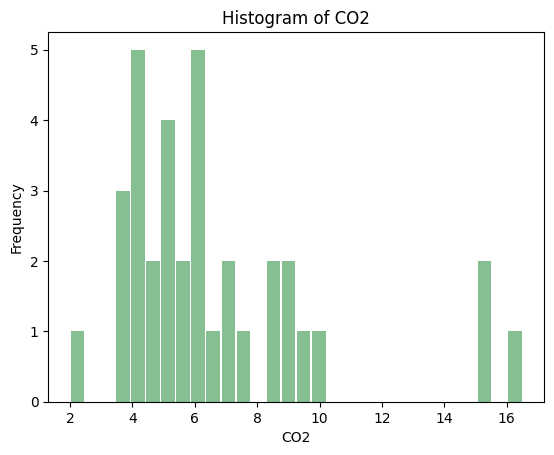

In [12]:
#creat a histogram
carbon_west.hist(column='CO2', bins=30, grid=False, color='#86bf91', zorder=2, rwidth=0.9)
plt.title('Histogram of CO2')
plt.xlabel('CO2')
plt.ylabel('Frequency')
plt.show()


Part b. Find the mean, median, and standard deviation.

In [13]:
#find the mean, median, and standard deviation
mean = np.mean(carbon_west['CO2'])
median = np.median(carbon_west['CO2'])
std = np.std(carbon_west['CO2'])
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std}")


Mean: 6.717142857142858
Median: 5.9
Standard Deviation: 3.3086454469884727


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [14]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")

Part a. Find the mean and standard deviation for murders without D.C.

In [15]:
murders.head(51)

,state,murder
0,AK,8.4
1,AL,8.3
2,AR,8.6
3,AZ,5.9
4,CA,4.6
5,CO,3.9
6,CT,2.8
7,DE,5.6
8,FL,5.0
9,GA,6.7


In [16]:
#filter out DC
numbers_without_DC = murders[murders['state'] != 'DC']

#calculate
mean_without_DC = np.mean(numbers_without_DC['murder'])
std_without_DC = np.std(numbers_without_DC['murder'])

print(f"Mean without DC: {mean_without_DC}")
print(f"std without DC: {std_without_DC}")

Mean without DC: 4.874
std without DC: 2.560297638947472


Part b. Find the five-number  summary without D.C.

In [17]:
#numbers_without_DC.describe()

q1 = np.percentile(numbers_without_DC['murder'], 25)
q3 = np.percentile(numbers_without_DC['murder'], 75)
min = np.min(numbers_without_DC['murder'])
max = np.max(numbers_without_DC['murder'])
median = np.median(numbers_without_DC['murder'])

#5 number summary
print(f"Min: {min}")
print(f"Q1: {q1}")
print(f"Median: {median}")
print(f"Q3: {q3}")
print(f"Max: {max}")

Min: 1.0
Q1: 2.625
Median: 4.85
Q3: 6.175
Max: 12.4


In [18]:
numbers_without_DC.describe()

,murder
count,50.000000
mean,4.874000
std,2.586291
min,1.000000
25%,2.625000
50%,4.850000
75%,6.175000
max,12.400000


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [19]:
#murders.describe()
mean_with_DC = np.mean(murders['murder'])
median_with_DC = np.median(murders['murder'])
std_with_DC = np.std(murders['murder'])

print(f"Mean with DC: {mean_with_DC}")
print(f"Median with DC: {median_with_DC}")
print(f"std with DC: {std_with_DC}\n\n")

q1 = np.percentile(murders['murder'], 25)
q3 = np.percentile(murders['murder'], 75)
min = np.min(murders['murder'])
max = np.max(murders['murder'])
median = np.median(murders['murder'])

print("5 number summery with DC")

print(f"Min: {min}")
print(f"Q1: {q1}")
print(f"Median: {median}")
print(f"Q3: {q3}")
print(f"Max: {max}")

Mean with DC: 5.252941176470588
Median with DC: 5.0
std with DC: 3.688687153732127


5 number summery with DC
Min: 1.0
Q1: 2.6500000000000004
Median: 5.0
Q3: 6.45
Max: 24.2


In [20]:
murders.describe()

,murder
count,51.000000
mean,5.252941
std,3.725391
min,1.000000
25%,2.650000
50%,5.000000
75%,6.450000
max,24.200000


**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [21]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")

Part a. Construct a scatterplot between square feet and price of a home.

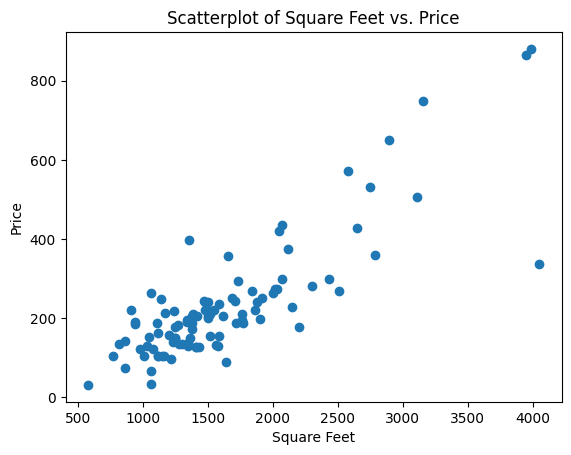

In [22]:
plt.scatter(houses['size'], houses['price'])
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('Scatterplot of Square Feet vs. Price')
plt.show()

Part b. Find the correlation between the two variables.

In [23]:
correlation = houses['size'].corr(houses['price'])
print(f"Correlation between size and price: {correlation}")


Correlation between size and price: 0.8337847885586537


A pretty strong positive correlation

Part c. Find and plot the regression line on top of the scatterplot.

In [36]:
x = houses[['size']]
y = houses['price']

model = LinearRegression()
model.fit(x, y)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: 0.18989116794379637
Intercept: -76.3893821074686


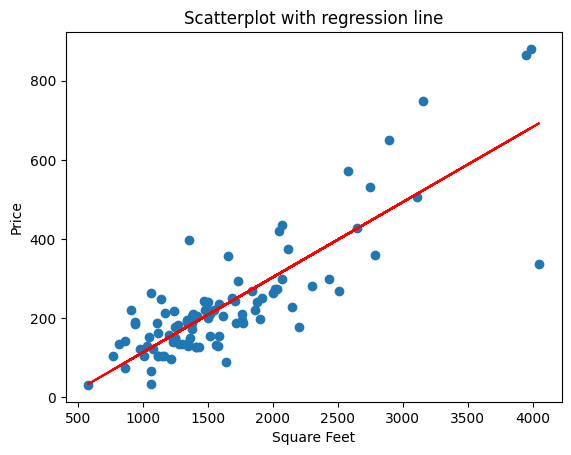

In [37]:
#houses.head()
plt.scatter(houses['size'], houses['price'])
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('Scatterplot with regression line')

# add the regression line
plt.plot(houses['size'], slope*houses['size'] + intercept, color='red')
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

Text(0, 0.5, 'Price')

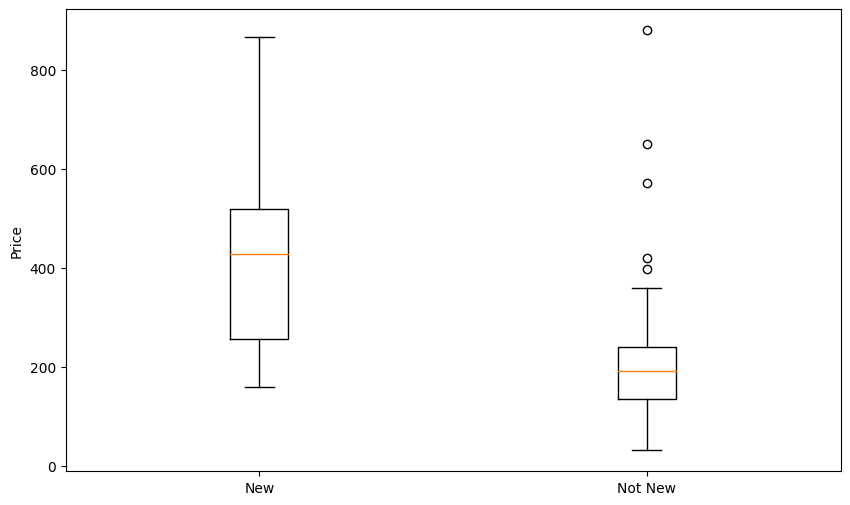

In [38]:
#box plot
plt.figure(figsize=(10, 6))
plt.boxplot([houses[houses['new'] == 1]['price'], houses[houses['new'] == 0]['price']], labels=['New', 'Not New'])
plt.ylabel('Price')

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [39]:
happy = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Happy.dat")

In [42]:
happy.head()
pd.crosstab(happy['marital'], happy['happiness'])

happiness,1,1 1,1 2,1 3,2,2 1,2 2,2 3,3,3 1,3 2,3 3
marital,,,,,,,,,,,,
fe,348,0,0,0,642,0,0,0,153,0,0,0
fem,0,5,0,0,0,0,0,0,0,0,0,0
mal,0,107,33,56,0,229,114,210,0,33,45,68
male,0,99,0,0,0,0,0,0,0,0,0,0
